In [2]:
cd C:\Users\venka\OneDrive\Desktop\Cl and Cd Pred from airfoil

C:\Users\venka\OneDrive\Desktop\Cl and Cd Pred from airfoil


# Import the Libraries

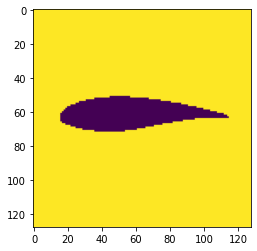

In [3]:
from pywebio.output import *
from pywebio.input import * 
import time
import numpy as np
import matplotlib.pyplot as plt
import math
import datetime
import pandas as pd
import urllib.request
import json
from pywebio.platform.flask import webio_view
from pywebio import STATIC_PATH
from flask import Flask, send_from_directory
from keras.models import load_model
import base64
from PIL import Image
from io import BytesIO
import matplotlib.image as mpimg
model = load_model("cd_predictor.h5")
put_markdown('The Cl/Cd predictor for an airfoil images.')
put_text("Upload the image to get the Cl/Cd value for the airfoil.")
with popup("Caution!"):
    put_text("Upload the binary image only with (128,128) size.")
put_text("Use the below website to get the images if you require.")
put_text("https://drive.google.com/drive/folders/1hEwBNF9_TAD_AVXiUfOJjFxX7A_o97ie?usp=sharing")
image = file_upload("Select a image:", accept=".")
im = Image.open(BytesIO(base64.b64decode(image['dataurl'].split(';')[1][7:])))
plt.imshow(im)
plt.imsave('yooo123.png',im)
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

img = mpimg.imread('yooo123.png')     
gray = rgb2gray(img)
gray[gray>=0.5]=1.0
gray[gray<0.5]=0.0
gray=gray.reshape(1,128,128,1)
out=model.predict(gray)
put_text("Predicted Cl/Cd value is: "+str(out[0]*309))
put_image('yooo123.png',width='3000px')